##Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Loading datasets

In [3]:
Autolib = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
Autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [4]:
Description = pd.read_excel('/content/columns_explanation.xlsx')
Description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


##Accessing information in the dataset

In [5]:
#Checking for data types for the variables
Autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [6]:
#Checking for info
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [7]:
# Checking for null values
Autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [8]:
#Checking for duplicates
Autolib.duplicated().any()

False

In [9]:
# Checking for the number of rows and columns in the dataset
Autolib.shape

(16085, 13)

In [78]:
#Checking for outliers in the dataset
outliers = []
def check_outliers(df):

  threshold = 3
  mean = np.mean(df)
  std = np.std(df)

  for i in df:
    z_score = (i - mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers
    
    

In [50]:
#Splitting the date column to year and month separate
import datetime
Autolib['date']= pd.to_datetime(Autolib['date'])
Autolib['month'] = Autolib['date'].dt.month
Autolib['year'] = Autolib['date'].dt.year

In [ ]:
# To find out the range
#sns.boxplot(Autolib.BlueCars_taken_sum, color='r')

In [10]:
Autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


#Univariate Analysis

#Numerical columns

In [13]:
sns.set(style='whitegrid', palette='muted', color_codes=True)

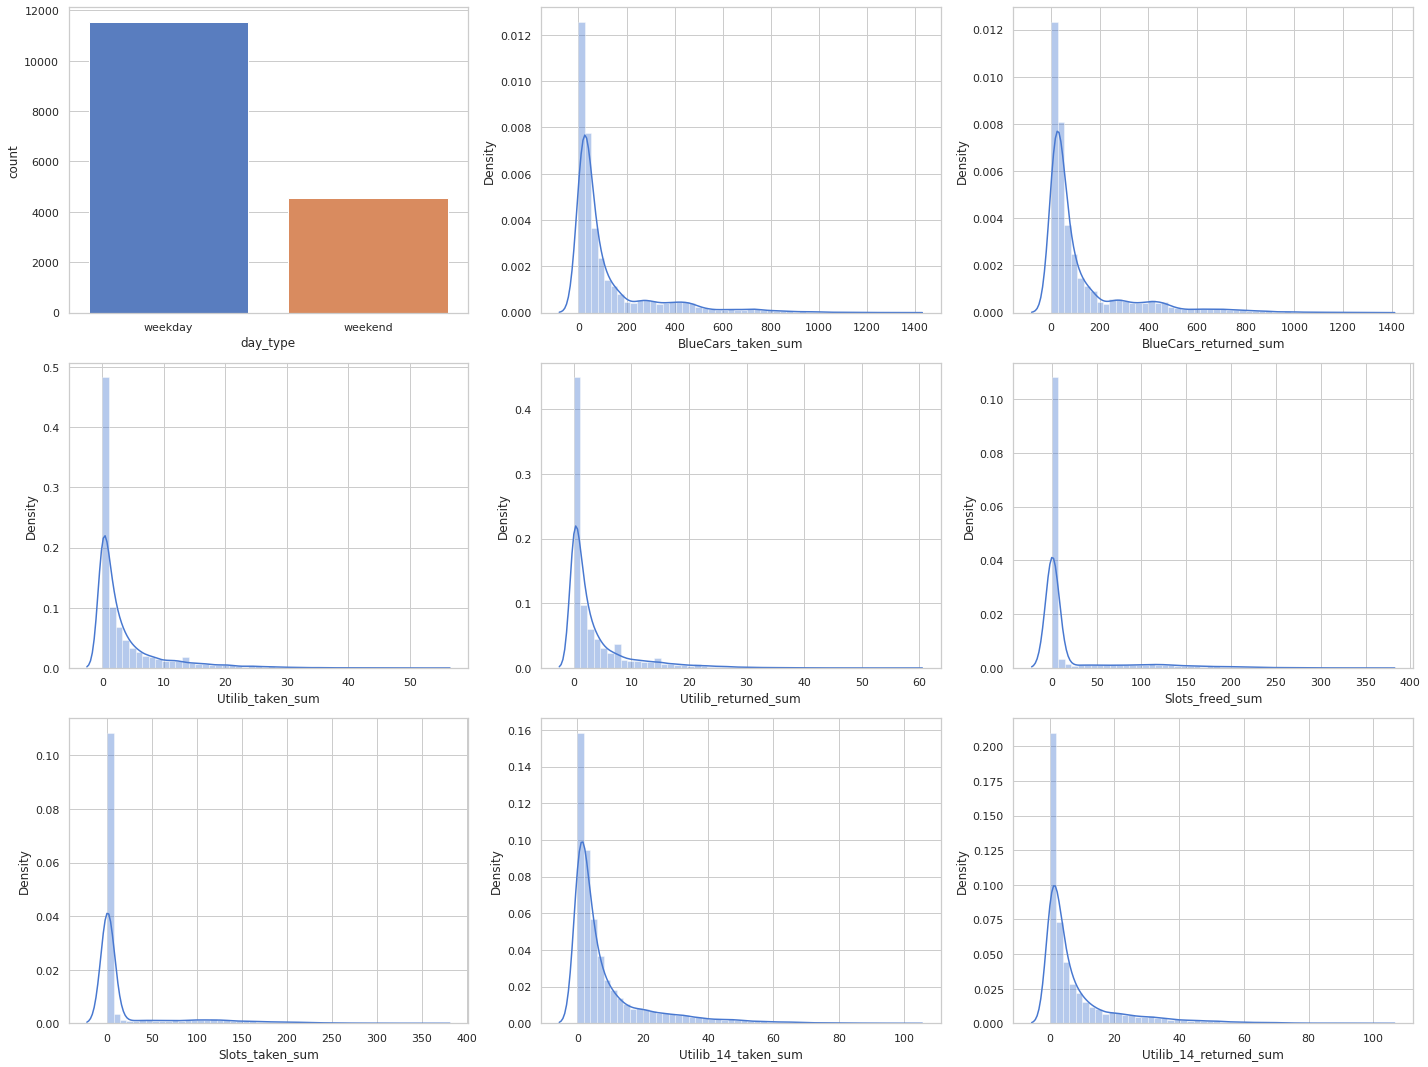

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, axes = plt.subplots(3,3, figsize=(20,15))
sns.countplot('day_type', data=Autolib, ax=axes[0,0])
sns.distplot(Autolib['BlueCars_taken_sum'], kde=True, ax=axes[0,1])
sns.distplot(Autolib['BlueCars_returned_sum'], kde=True, ax=axes[0,2])
sns.distplot(Autolib['Utilib_taken_sum'], kde=True, ax=axes[1,0])
sns.distplot(Autolib['Utilib_returned_sum'], kde=True, ax=axes[1,1])
sns.distplot(Autolib['Slots_freed_sum'], kde=True, ax=axes[1,2])
sns.distplot(Autolib['Slots_taken_sum'], kde=True, ax=axes[2,0])
sns.distplot(Autolib['Utilib_14_taken_sum'], kde=True, ax=axes[2,1])
sns.distplot(Autolib['Utilib_14_returned_sum'], kde=True, ax=axes[2,2])
plt.tight_layout()

In [25]:
import statistics
print('The mean of blue cars returned is =', statistics.mean(Autolib['BlueCars_returned_sum']))
print('The median of blue cars returned is =', statistics.median(Autolib['BlueCars_returned_sum']))
print('The mean of utilib taken sum is =', statistics.mean(Autolib['Utilib_taken_sum']))
print('The median utilib taken sum is =', statistics.median(Autolib['Utilib_taken_sum']))

The mean of blue cars returned is = 125.912713708424
The median of blue cars returned is = 46
The mean of utilib taken sum is = 3.69829033260802
The median utilib taken sum is = 1


* It is observable that all our numerical columns are right-skewed(positively skewed distribution) and does not follow a normal distribution curve

* Meaning the mean is generally there to the right side of the median of the data and from the above test calculation we see the effect of a positively skewed distribution on the dataset variables which results to mean being greater than the mediam since the results are spread towards the lower positive end of the distribution

#Categorical column

In [26]:
# day type value counts
Autolib['day_type'].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [27]:
# Percentage of day type
((Autolib['day_type'].value_counts())/len(Autolib['day_type']))*100

weekday    71.768729
weekend    28.231271
Name: day_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


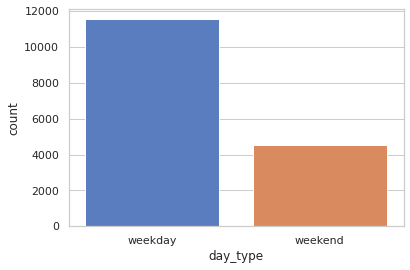

In [25]:
sns.countplot(Autolib.day_type)

* It is observable that the count of weekdays is higher that weekends

#Bivariate Analysis

Numerical-Numerical Variable Analysis

In [37]:
Autolib_subset = Autolib[['day_type','BlueCars_taken_sum','BlueCars_returned_sum','Utilib_taken_sum','Utilib_returned_sum','Slots_freed_sum','Slots_taken_sum']]

In [40]:
Autolib_subset.head()

,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Slots_freed_sum,Slots_taken_sum
0,weekday,110,103,3,2,22,20
1,weekday,98,94,1,1,23,22
2,weekday,138,139,0,0,27,27
3,weekday,104,104,2,2,25,21
4,weekday,114,117,3,3,18,20


In [39]:
#Correlation
Autolib_subset.corr()

,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Slots_freed_sum,Slots_taken_sum
BlueCars_taken_sum,1.000000,0.998660,0.893833,0.892850,0.948575,0.947996
BlueCars_returned_sum,0.998660,1.000000,0.893613,0.893268,0.948258,0.948771
Utilib_taken_sum,0.893833,0.893613,1.000000,0.981982,0.853760,0.853049
Utilib_returned_sum,0.892850,0.893268,0.981982,1.000000,0.852939,0.852936
Slots_freed_sum,0.948575,0.948258,0.853760,0.852939,1.000000,0.999221
Slots_taken_sum,0.947996,0.948771,0.853049,0.852936,0.999221,1.000000


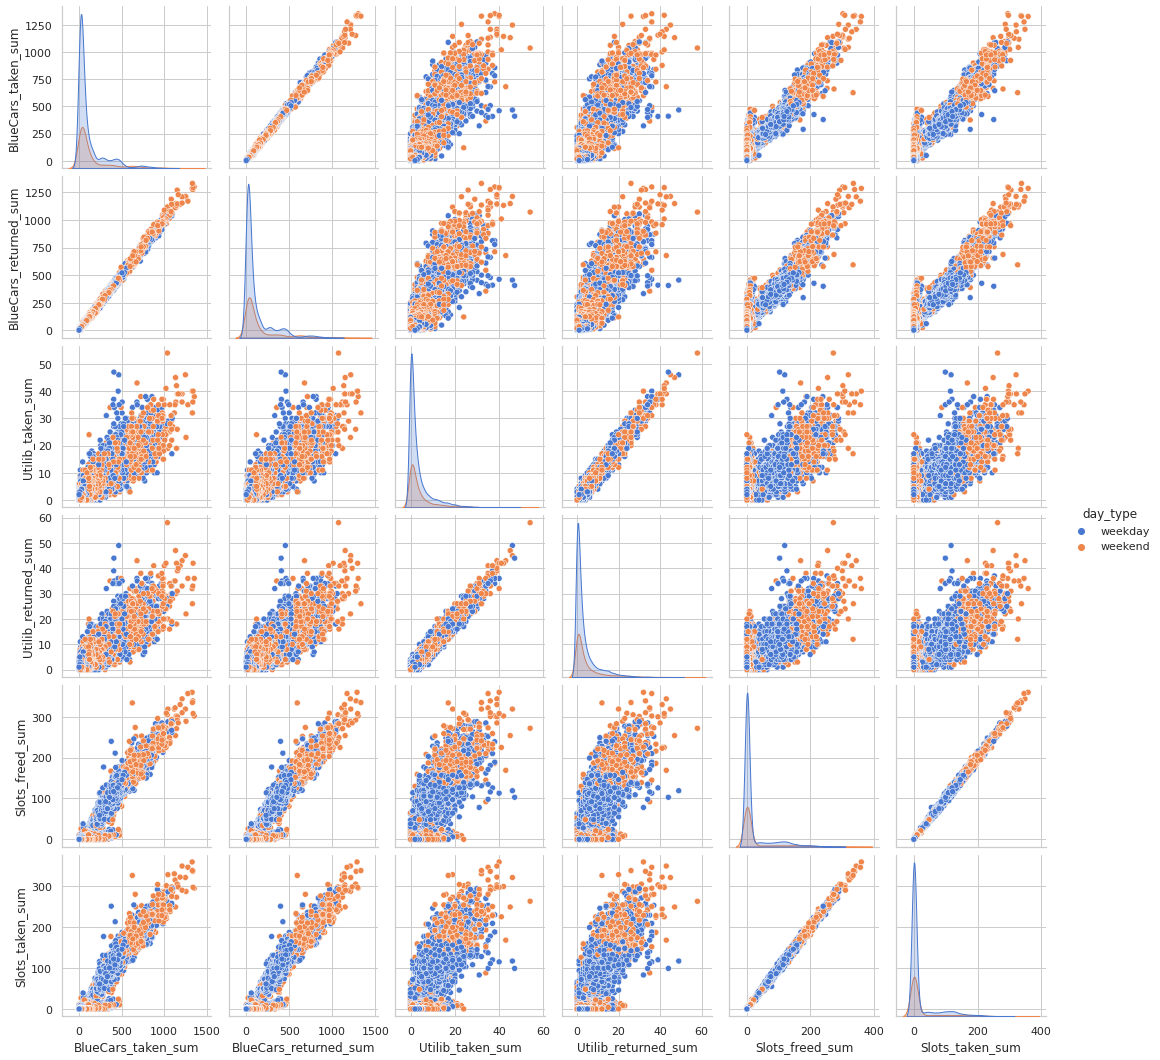

In [38]:
# pairplot matrrix
sns.pairplot(hue='day_type', data=Autolib_subset)

* There is a strong/perfect correlation between variables in our dataset and the pearsons correlation coeffient lies betweem a maximum of positive 1. to o.8 being the minimum which is close to 1. thus concluding that the variables in our dataset are strongly positive correlated

# Sampling

The Autolib dataset consist of 16085 rows and 13 columns which is alot to work with when performing a hypothesis test, so we are going to sample the dataset to a sample size of 1609 rows and 13 columns

In [57]:
Autolib_sample = Autolib.sample(n=1609).reset_index()

In [61]:
Autolib_sample.head()

,index,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,month,year
0,5597,92160,2018-06-04,1440,0,weekday,21,26,0,1,1,2,0,0,6,2018
1,13780,94140,2018-02-04,1440,6,weekend,80,83,0,1,10,9,0,0,2,2018
2,10509,93150,2018-03-22,1440,3,weekday,7,7,0,0,2,2,2,3,3,2018
3,351,75003,2018-02-09,1439,4,weekday,224,228,3,3,6,7,56,58,2,2018
4,12813,93800,2018-01-03,1439,2,weekday,14,13,1,0,1,1,1,1,1,2018


# Null and Alternative hypothesis

1.Null hypothesis is that there is a linear correlation between the sum of blue cars taken and sum of blue cars returned while alternative hypothesis is that there is no linear correlation between them.

2.Null hypothesis is that there is a linear correlatuion between the sum of utilib cars taken and sum of utilib cars returned while alternative hypothesis states that there is no linear relationship between them.

3.Null hypothesis is free charging slots are less than the sum of blue cars returned while alternative states that there is a linear relationship between free slots and returned blue cars

#Correlation Tests

Pearsons Correlation Coefficient

1.Correlation between sum of blue cars taken and sum of blue cars returned

In [65]:
from scipy.stats import pearsonr
stat, p = pearsonr(Autolib_sample['BlueCars_taken_sum'], Autolib_sample['BlueCars_returned_sum'])
print('stat=%.3f, p=%.3f' %(stat, p))

if p > 0.05:
  print('Probably independent')
else:
  print('Probably dependent')

stat=0.999, p=0.000
Probably dependent


2.Correlation between sum of utilib cars taken and utilib cars returned

In [67]:
from scipy.stats import spearmanr
stat, p = spearmanr(Autolib_sample['Utilib_taken_sum'], Autolib_sample['Utilib_returned_sum'])
print('stat=%.3f, p=%.3f' %(stat, p))

if p > 0.05:
  print('Probably independent')
else:
  print('Probably dependent')

stat=0.922, p=0.000
Probably dependent


3.Correlation between the sum of blue cars returned and sum of free slots

In [68]:
stat, p = pearsonr(Autolib_sample['BlueCars_returned_sum'], Autolib_sample['Slots_freed_sum'])
print('stat=%.3f, p=%.3f' %(stat, p))

if p > 0.05:
  print('Probably independent')
else:
  print('Probably dependent')

stat=0.950, p=0.000
Probably dependent


Conclusion:

1.Accepting the null hypothesis that there is a linear relationship between blue cars taken and blue cars returned

2.Accepting the null hypothesis that there is a linear relationship between utilib cars taken and utilib cars returned

3.Rejecting the null hypothesis that there are less free slots for returned blue cars

# Normality tests

Shapiro-Wilk Test

In [69]:
from scipy.stats import shapiro

stat, p = shapiro(Autolib_sample['BlueCars_taken_sum'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.652, p=0.000
Probably not Gaussian


In [70]:
stat, p = shapiro(Autolib_sample['BlueCars_returned_sum'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.651, p=0.000
Probably not Gaussian


In [71]:
stat, p = shapiro(Autolib_sample['Utilib_taken_sum'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.652, p=0.000
Probably not Gaussian


In [72]:
stat, p = shapiro(Autolib_sample['Utilib_returned_sum'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.655, p=0.000
Probably not Gaussian


In [74]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(Autolib_sample['BlueCars_taken_sum'], Autolib_sample['BlueCars_returned_sum'])
print('stat=%.3f, p=%.3f' %(stat, p))

if p > 0.05:
  print('Probably same distribution')
else:
  print('Probably different distribution')

stat=0.022, p=0.982
Probably same distribution
